# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

# 1. Carregando e Juntando as Bases

In [2]:
tbl_funcionarios = pd.read_csv('./DATASETS/tb_funcionarios.csv')
tbl_survey_funcionarios = pd.read_csv('./DATASETS/tb_pesquisa_funcionarios.csv')
tbl_survey_gestores = pd.read_csv('./DATASETS/tb_pesquisa_gestores.csv')

In [3]:
tbl_funcionarios.shape, tbl_survey_funcionarios.shape, tbl_survey_gestores.shape

((4410, 24), (4410, 4), (4410, 3))

In [4]:
# Tabela final precisa ter 4410 Linhas e 24 + 4 + 3 - 2 = 29 Colunas
abt = (
    tbl_funcionarios.merge(
        right= tbl_survey_funcionarios,
        on= 'IDDoEmpregado',
        how= 'left'
    ).merge(
        right= tbl_survey_gestores,
        on= 'IDDoEmpregado',
        how= 'left'
    )
)
abt.shape

(4410, 29)

# 2. EDA

## Univariado

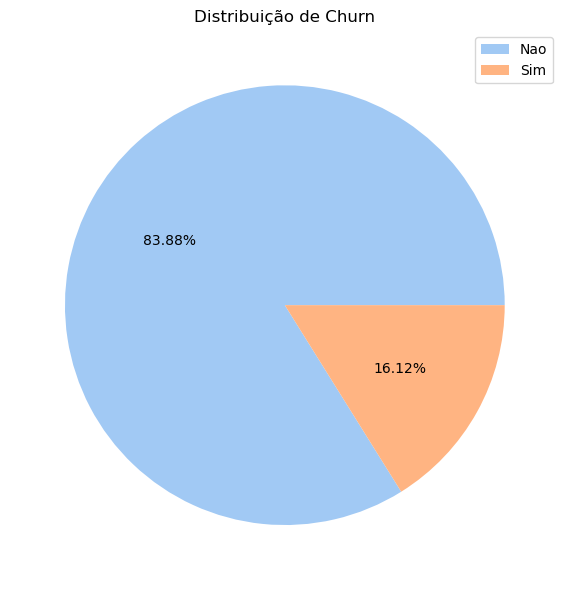

In [5]:
plt.figure(figsize=(12, 6))
churn_counts = abt['Rotatividade'].value_counts()
churn_counts.plot(kind='pie', autopct='%1.2f%%', colors=sns.color_palette('pastel'), labels=None)
plt.legend(labels=churn_counts.index, loc="upper right")
plt.ylabel('')
plt.title('Distribuição de Churn')

plt.tight_layout() 

plt.show()

In [36]:
np.linspace(
    abt['Idade'].min(),
    abt['Idade'].max(),
    11,
    dtype= 'int'
)

array([18, 22, 26, 30, 34, 39, 43, 47, 51, 55, 60])

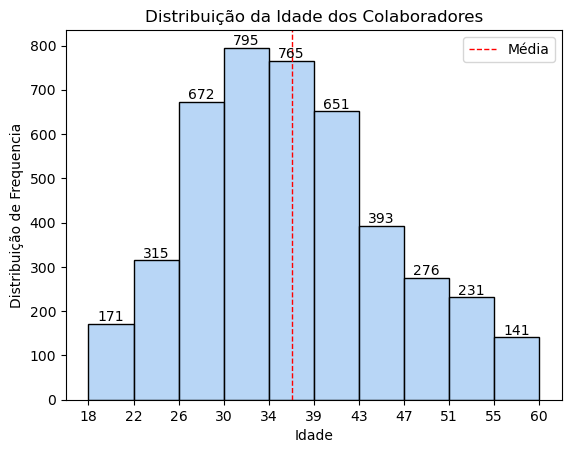

In [60]:
n_bins = 10

ax = sns.histplot(
    data= abt,
    x= 'Idade',
    bins= n_bins,
    color= sns.color_palette('pastel')[0]
)

intervals = np.linspace(abt['Idade'].min(), abt['Idade'].max(), n_bins+1)

plt.xticks(intervals, labels=intervals.astype(int))

plt.xlabel('Idade')
plt.ylabel('Distribuição de Frequencia')
plt.title('Distribuição da Idade dos Colaboradores')

plt.axvline(x = abt['Idade'].mean(), color = 'red', linestyle= '--', linewidth= 1, label= 'Média')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend()
plt.show()

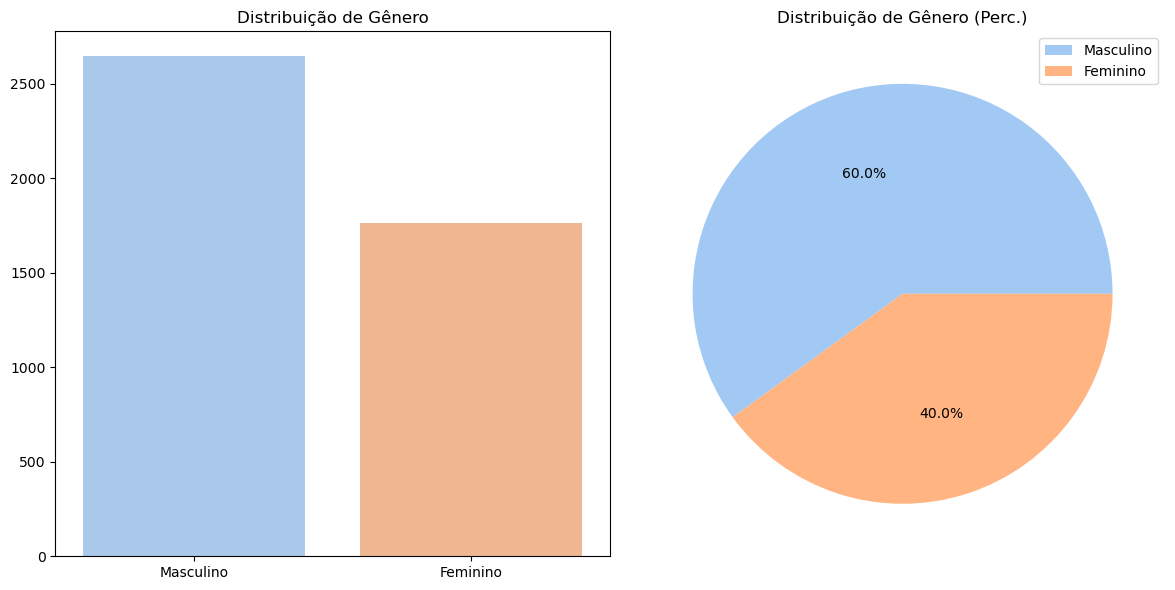

In [6]:
plt.figure(figsize=(12, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)  # (linhas, colunas, índice)
sns.barplot(
    data=abt,
    x=abt['Genero'].value_counts().index.tolist(),
    y=abt['Genero'].value_counts().values.tolist(),
    palette=sns.color_palette('pastel')
)
plt.title('Distribuição de Gênero')

# Gráfico de pizza
plt.subplot(1, 2, 2)  # (linhas, colunas, índice)
gender_counts = abt['Genero'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), labels=None)
plt.legend(labels=gender_counts.index, loc="upper right")
plt.ylabel('')
plt.title('Distribuição de Gênero (Perc.)')

plt.tight_layout() 

plt.show()

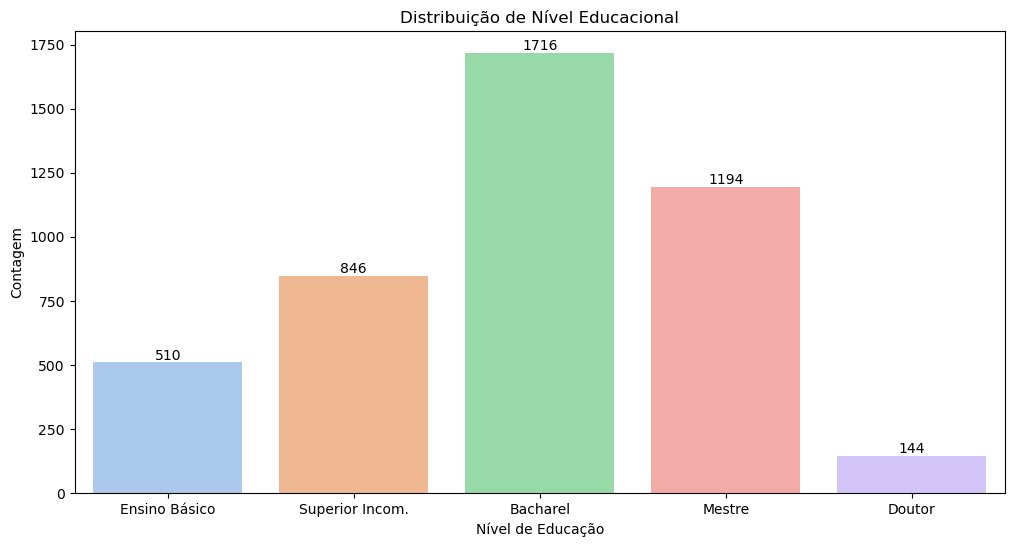

In [7]:
plt.figure(figsize=(12, 6))

# Gráfico de barras
ax = sns.barplot(
    data=abt,
    x=abt['Educacao'].value_counts().index.tolist(),
    y=abt['Educacao'].value_counts().values.tolist(),
    palette=sns.color_palette('pastel')
)

plt.xticks(ticks=range(5), labels=['Ensino Básico', 'Superior Incom.', 'Bacharel', 'Mestre', 'Doutor'])
plt.title('Distribuição de Nível Educacional')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

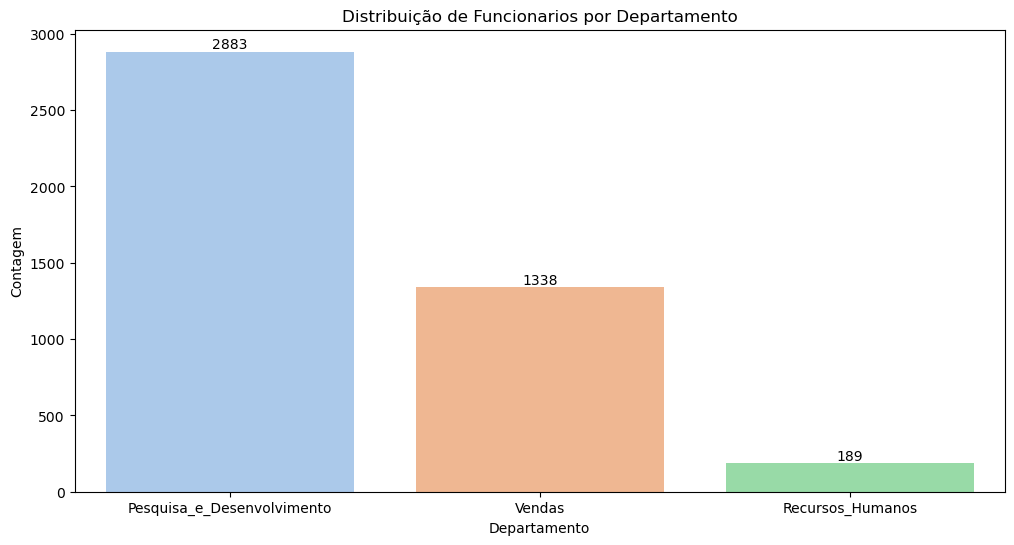

In [8]:
plt.figure(figsize=(12, 6))

# Gráfico de barras
ax = sns.barplot(
    data=abt,
    x=abt['Departamento'].value_counts().index.tolist(),
    y=abt['Departamento'].value_counts().values.tolist(),
    palette=sns.color_palette('pastel')
)

plt.title('Distribuição de Funcionarios por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

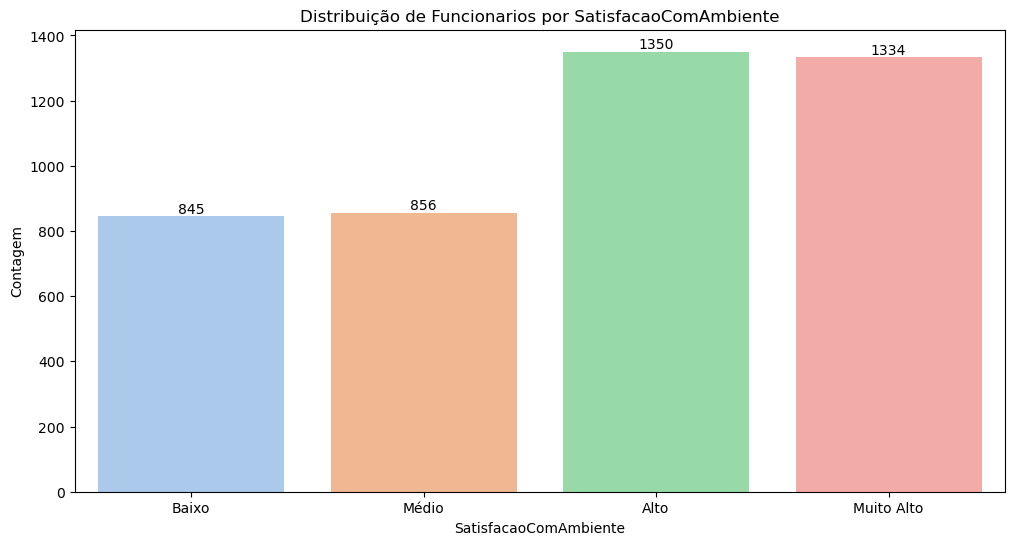

In [9]:
plt.figure(figsize=(12, 6))

# Gráfico de barras
ax = sns.barplot(
    data=abt,
    x=abt['SatisfacaoComAmbiente'].value_counts().index.tolist(),
    y=abt['SatisfacaoComAmbiente'].value_counts().values.tolist(),
    palette=sns.color_palette('pastel')
)

plt.title('Distribuição de Funcionarios por SatisfacaoComAmbiente')
plt.xlabel('SatisfacaoComAmbiente')
plt.xticks(ticks=range(4), labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])
plt.ylabel('Contagem')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Nesta etapa, passamos por algumas variáveis que nos explicam um pouco sobre o público que estamos lidando. Observamos que:

* Temos uma alta taxa de Churn (`16.12%`)

* Publico masculino predominante (`60%`)

* Os colaboradores, em sua maioria, possuem Ensino Superior Completo ou Mestrado. Devido as exigencias do mercado, normalmente esse público possui mais oportunidades em comparação com os que não possuem educação de niveis superiores.

* Pesquisa e Desenvolvimento é o departamento com maior volume de funcionários.

* A satisfação dos colaboradores em relação ao ambiente de trabalho, embora predominantemente boa, apresenta indices altos de satisfação média/baixa.

## Multivariada

Aqui vamos ver como a `taxa de rotatividade` está presente no público.